In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
cmap = matplotlib.cm.get_cmap('summer')
%matplotlib inline
from datetime import date, datetime
import sys
sys.path.append('/Users/nikola/work-ui/multi-scale')
sys.path.append("../")
import differences_functions as df
from src.data_class import DataField, load_enso_index, load_station_data
import itertools as it
from scipy.signal import argrelextrema

In [2]:
enso = load_enso_index("../../data/nino34raw.txt", '3.4', date(1900, 1, 1), date(2015, 1, 1), anom = True)

enso.wavelet(12, 'm', cut = 12, continuous_phase = False)
ann_phase = enso.phase.copy()
ann_cycle = enso.amplitude * np.cos(enso.phase)
enso.wavelet(12, 'm', cut = 12, continuous_phase = True)
ann_phase_cont = enso.phase.copy()

enso.wavelet(23, 'm', cut = 12, continuous_phase = False)
qb_phase = enso.phase.copy()
qb_cycle = enso.amplitude * np.cos(enso.phase)
enso.wavelet(23, 'm', cut = 12, continuous_phase = True)
qb_phase_cont = enso.phase.copy()

** loaded
** anomalising
[2017-02-28 10:27:04.318553] Nino3.4 data loaded with shape (1380,). Date range is 1/1900 - 12/2014 inclusive.


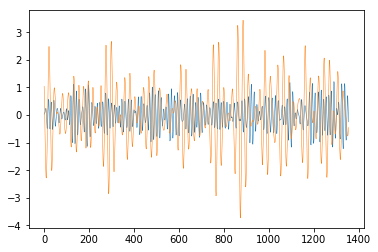

In [3]:
plt.plot(ann_cycle, linewidth = 0.5)
plt.plot(qb_cycle, linewidth = 0.5)
plt.show()

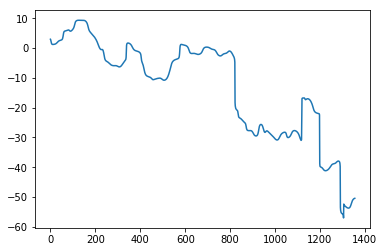

In [22]:
n = (12./12.)
m = (23./12.)
# n, m = 1, 1

diff1 = n*ann_phase_cont - m*qb_phase_cont
diff2 = 1*ann_phase_cont - 1*qb_phase_cont

plt.plot(diff1)
# plt.plot(np.gradient(diff))
# plt.ylim([-1,1])
plt.show()

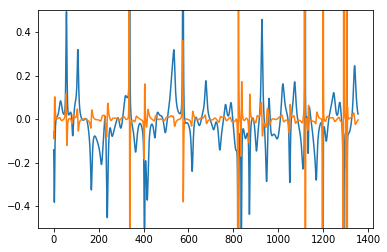

In [24]:
plt.plot(np.gradient(diff1))
plt.plot(np.gradient(np.gradient(diff1)))
plt.ylim([-0.5, 0.5])
plt.show()

../differences_functions.py:97: ComplexWarning: Casting complex values to real discards the imaginary part
  m*pair[1][max(t - points,0) : min(t + points + 1, pair[1].shape[0])])))


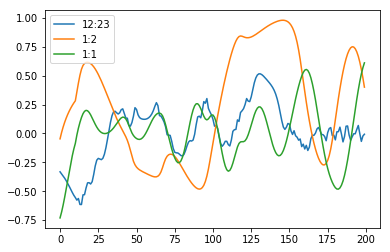

In [5]:
diffs = df.get_circular_variance_index([ann_phase_cont, qb_phase_cont], ratios = [12, 23], points = 10)
plt.plot(diffs[:200], label = "12:23")
diffs = df.get_circular_variance_index([ann_phase_cont, qb_phase_cont], ratios = [1, 2], points = 10)
plt.plot(diffs[:200], label = "1:2")
diffs = df.get_circular_variance_index([ann_phase_cont, qb_phase_cont], points = 10)
plt.plot(diffs[:200], label = "1:1")
plt.legend()
plt.show()